In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
#train_data = pd.read_csv("train.csv")
#pickle.dump(train_data,open("train_csv.pkl","wb" ))

In [2]:
cross=open('train_csv.pkl','rb')
train_data=pickle.load(cross)

In [3]:
train_data.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [5]:
train_data.columns

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg', 'iterm', 'locdt',
       'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey'],
      dtype='object')

In [6]:
df=train_data.reindex(columns=['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'etymd',
                               'flbmk', 'flg_3dsmk','hcefg', 'insfg', 'iterm', 'locdt',
                               'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey','fraud_ind', ])

In [7]:
np.shape(df)

(1521787, 22)

In [10]:
df.iloc[0]

acqic          6881
bacno        113261
cano          38038
conam         513.8
contp             5
csmcu             0
etymd             0
flbmk             N
flg_3dsmk         N
hcefg             5
insfg             N
iterm             0
locdt            33
loctm        172652
mcc             457
mchno         59333
ovrlt             N
scity             0
stocn           102
stscd             0
txkey        516056
fraud_ind         0
Name: 0, dtype: object

In [30]:
X_train_no_str=df[['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu','etymd',
                   'hcefg', 'iterm', 'locdt',
                   'loctm', 'mcc', 'mchno', 'scity', 'stocn', 'stscd', 'txkey','fraud_ind']]
dataset=np.array(X_train_no_str)

In [36]:
#train_data 標記為1的比例
a=0
for i in range(1521787):
    if X_train_no_str[i,17]==1:
        a+=1
print(a)
print(a/1521787)

20355
0.013375722095142093


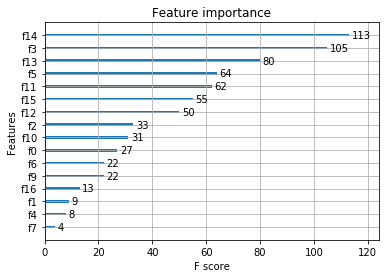

In [69]:
#約10分鐘，找重要變數
import xgboost as xgb
from numpy import loadtxt 
from xgboost import XGBClassifier 
from xgboost import plot_importance 
from matplotlib import pyplot 
import warnings 
warnings.filterwarnings("ignore")  
# 資料集劃分特徵矩陣X和目標變數y 
XX = dataset[:,0:17] 
yy = dataset[:,17] 
# 全量資料集訓練模型 
model = XGBClassifier() 
model.fit(XX,yy) 
# 變數重要性視覺化 
plot_importance(model)
pyplot.show()

In [23]:
#'stocn':f14
#'conam':f3
#'scity':f13
X_tr=df[['stocn','conam','scity','fraud_ind']]

In [37]:
p=X_tr[X_tr['fraud_ind']==0]
q=X_tr[X_tr['fraud_ind']==1]

In [39]:
np.shape(p)[0],np.shape(q)[0]

(1501432, 20355)

In [40]:
X_train_0=p.sample(n=1000)
X_train_1=q.sample(n=1000)

In [42]:
re_X_train = pd.concat([X_train_0,X_train_1], axis=0, ignore_index=True)

In [43]:
re_X_train

,stocn,conam,scity,fraud_ind
0,102,592.25,2310,0
1,102,683.25,5817,0
2,102,603.88,5817,0
3,102,513.80,0,0
4,102,851.64,6023,0
5,102,134.50,5817,0
6,20,305.46,379,0
7,102,794.54,5817,0
8,102,513.80,5817,0
9,102,229.88,5817,0


In [44]:
ar_re_xtr=np.array(re_X_train)
X=ar_re_xtr[:,0:3]
y=ar_re_xtr[:,3]

In [47]:
from sklearn import svm

import time
tStart = time.time()
svc_model = svm.SVC(kernel='linear')
svc_model.fit(X,y)
tEnd = time.time()

print (tEnd - tStart)

1652.501885175705


In [48]:
test_data = pd.read_csv("test.csv")

In [49]:
np.shape(test_data)

(421665, 22)

In [50]:
X_test=test_data[['stocn','conam','scity']]

In [51]:
fi=svc_model.predict(X_test)

In [53]:
len(fi)

421665

In [55]:
k=0
for i in range(421665):
    if fi[i]==1:
        k+=1
print(k)
print(k/421665)

43817
0.10391424472033486


In [ ]:
k=0
for i in range(421665):
    if fi[i]==1:
        print(i)

In [ ]:
kkk=pd.DataFrame(fi)
kkk.rename(columns={kkk.columns[0]:"fraud_ind"}, inplace=True)
kkk

In [ ]:
idx=test_data[['txkey']]
idx

In [ ]:
result=pd.merge(idx,kkk,left_index=True,right_index=True,how='outer')
result

In [69]:
result.to_csv("output1.csv",index=False,sep=',')